In [1]:
from transformers import Wav2Vec2Tokenizer, Wav2Vec2ForCTC, Wav2Vec2CTCTokenizer
from datasets import load_dataset
import soundfile as sf
import torch
import librosa
import IPython.display as ipd
%matplotlib notebook
import matplotlib.pyplot as plt

### load model and tokenizer

In [2]:
tokenizer = Wav2Vec2CTCTokenizer.from_pretrained("facebook/wav2vec2-large-960h-lv60")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-large-960h-lv60")

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-960h-lv60 and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### load and play audio file

<IPython.core.display.Javascript object>


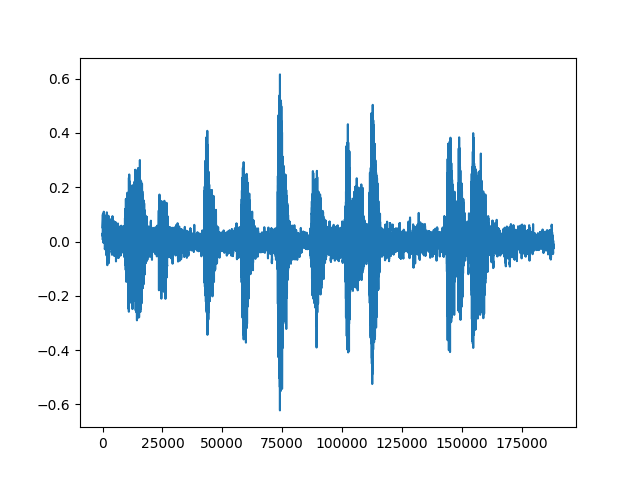

In [3]:
MODEL_SR = 16000
wav, sr = sf.read('/home/moshe/Documents/audacity/demo_wav2vec2.wav')
wav = librosa.resample(wav, sr, MODEL_SR)
ipd.display(ipd.Audio(wav,rate=MODEL_SR))
plt.figure()
plt.plot(wav)

In [4]:
# retrieve logits
logits = model(torch.from_numpy(wav).float().view(1, -1)).logits
# take argmax and decode
predicted_ids = torch.argmax(logits, dim=-1)
transcription = tokenizer.batch_decode(predicted_ids)

In [5]:
print(transcription[0])

ONE TWO THREE FOUR FIVE WALES MODER AND COLV ALAKE FALAN
